In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dfRetro = pd.read_csv('C:\\Users\\Sam\\Documents\\Data Mining\\Project\\retrosheet-events-plus-woba-2005_2015.csv')
altitudes = pd.read_excel("C:\\Users\\Sam\\Documents\\Data Mining\\Project\\Park_Factor\\Project_Code\\MLB_Stadium_Altitudes.xlsx")


In [3]:
dfRetro = dfRetro.drop(['time_since_1900', 'wOBA_pts', 'bat_hand_cd', 'base1_run_id', 'base2_run_id', 'base3_run_id','pitch_seq_tx','po1_fld_cd', 'po2_fld_cd','pit_start_fl', 'pa_ball_ct', 'pa_strike_ct', 'bat_fate_id', 'run1_fate_id', 'run2_fate_id', 'run3_fate_id', 'battedball_cd', 'inn_new_fl', 'inn_end_fl', 'pit_hand_cd'], axis=1)


In [4]:
#now drop any unnecessary events we don't need 
#stolen bases (4), caught stealing (6), pickoff (8), 
print(len(dfRetro))

dfRetro = dfRetro[dfRetro.event_cd != 4]
dfRetro = dfRetro[dfRetro.event_cd != 6]
dfRetro = dfRetro[dfRetro.event_cd != 8]


print(len(dfRetro))

2111526
2069898


In [5]:
events_with_altitudes = pd.merge(dfRetro, altitudes, on='home_team_id')


In [97]:
###Calculating runs per 9 here 
team_ids = []
for ii in dfRetro.home_team_id.unique():
    team_ids.append(ii)
team_ids = sorted(team_ids)
total_runs = [[0 for i in range(2)] for j in range(30)] 
for i in range(0,30):
     total_runs[i][0] = team_ids[i]
for i in range(0,30):
    
    for j in range(0,len(events_with_altitudes)):
    
        if events_with_altitudes['home_team_id'][j] == total_runs[i][0]:
        
            total_runs[i][1] += events_with_altitudes['event_runs_ct'][j]

KeyboardInterrupt: 

['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CHA', 'CHN', 'CIN', 'CLE', 'COL', 'DET', 'FLO', 'HOU', 'KCA', 'LAN', 'MIA', 'MIL', 'MIN', 'NYA', 'NYN', 'OAK', 'PHI', 'PIT', 'SDN', 'SEA', 'SFN', 'SLN', 'TBA', 'TEX', 'TOR', 'WAS']


In [66]:
test = events_with_altitudes.drop_duplicates('game_id')
games_played = test.groupby('home_team_id').size()
#print(games_played)
innings_played = games_played * 9
print(innings_played)
print(total_runs)

home_team_id
ANA    8019
ARI    8019
ATL    8019
BAL    8010
BOS    8019
CHA    8019
CHN    8010
CIN    8028
CLE    8001
COL    8019
DET    8019
FLO    5103
HOU    8010
KCA    8019
LAN    8019
MIA    2916
MIL    8019
MIN    8019
NYA    8019
NYN    8019
OAK    8019
PHI    8019
PIT    8019
SDN    8019
SEA    8028
SFN    8019
SLN    8010
TBA    8019
TEX    8019
TOR    8019
WAS    8001
dtype: int64
[['ANA', 7630], ['ARI', 8401], ['ATL', 7486], ['BAL', 8452], ['BOS', 8906], ['CHA', 8169], ['CHN', 7919], ['CIN', 8175], ['CLE', 7924], ['COL', 9702], ['DET', 8375], ['FLO', 5227], ['HOU', 7603], ['KCA', 8179], ['LAN', 7128], ['MIL', 8086], ['MIN', 7994], ['NYA', 8574], ['NYN', 7303], ['OAK', 7405], ['PHI', 8127], ['PIT', 7517], ['SDN', 6599], ['SEA', 7086], ['SFN', 7012], ['SLN', 7511], ['TBA', 7626], ['TEX', 8995], ['TOR', 8211], ['WAS', 7503]]


In [98]:
runs_per_9 = [[0 for i in range(2)] for j in range(30)] 
for i in range(0,30):
     runs_per_9[i][0] = team_ids[i]
#print(runs_per_9)

for i in range(len(total_runs)):
    print(team_ids[i], total_runs[i][1], innings_played[i])
    #print(innings_played[i])
    num = (total_runs[i][1] * 9)
    denom = innings_played[i]
    runs_per_9[i][1] = num/denom
    #runs_per_9[i][1] = ((total_runs[i][1] * 9)/innings_played[i])
print(runs_per_9)

ANA 7630 8019
ARI 0 8019
ATL 0 8019
BAL 0 8010
BOS 0 8019
CHA 0 8019
CHN 0 8010
CIN 0 8028
CLE 0 8001
COL 0 8019
DET 0 8019
FLO 0 5103
HOU 0 8010
KCA 0 8019
LAN 0 8019
MIA 0 2916
MIL 0 8019
MIN 0 8019
NYA 0 8019
NYN 0 8019
OAK 0 8019
PHI 0 8019
PIT 0 8019
SDN 0 8019
SEA 0 8028
SFN 0 8019
SLN 0 8010
TBA 0 8019
TEX 0 8019
TOR 0 8019
[['ANA', 8.5634118967452295], ['ARI', 0.0], ['ATL', 0.0], ['BAL', 0.0], ['BOS', 0.0], ['CHA', 0.0], ['CHN', 0.0], ['CIN', 0.0], ['CLE', 0.0], ['COL', 0.0], ['DET', 0.0], ['FLO', 0.0], ['HOU', 0.0], ['KCA', 0.0], ['LAN', 0.0], ['MIA', 0.0], ['MIL', 0.0], ['MIN', 0.0], ['NYA', 0.0], ['NYN', 0.0], ['OAK', 0.0], ['PHI', 0.0], ['PIT', 0.0], ['SDN', 0.0], ['SEA', 0.0], ['SFN', 0.0], ['SLN', 0.0], ['TBA', 0.0], ['TEX', 0.0], ['TOR', 0.0]]


In [91]:
per_9 = []
for ii in range(len(runs_per_9)):
    per_9.append(runs_per_9[ii][1])
print(per_9)

[8.5634118967452295, 9.4287317620650946, 8.4112359550561795, 9.4859708193041534, 9.9955106621773293, 9.1786516853932589, 8.8778026905829588, 9.1957255343082114, 8.89337822671156, 10.888888888888889, 14.770723104056437, 5.8730337078651687, 8.5331088664422001, 9.1795735129068454, 22.0, 9.0751964085297416, 8.9719416386083051, 9.6228956228956228, 8.1964085297418627, 8.3108866442199769, 9.1212121212121211, 8.4365881032547705, 7.4062850729517393, 7.9439461883408073, 7.8698092031425366, 8.4393258426966291, 8.5589225589225588, 10.095398428731762, 9.2154882154882163, 8.4398200224971873]


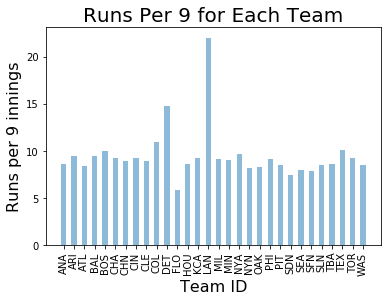

In [92]:
plt.title("Runs Per 9 for Each Team", size=20)
plt.xlabel("Team ID", size=16)
plt.ylabel("Runs per 9 innings", size=16)
y_pos = np.arange(len(runs_per_9))
plt.bar(y_pos, per_9, align='center', alpha=0.5, width=0.5)
plt.xticks(y_pos, team_ids, rotation='vertical')
plt.figure(figsize=(50, 3))

plt.show()

In [28]:
print(runs_per_9[5][1])

9.16835016835


In [67]:
temp_count = 0
for index, row in dfRetro.iterrows():
    if row['home_team_id'] == "MIL":
        temp_count+= row['event_runs_ct']
print(temp_count)

8086


In [72]:
tempy = temp_count * 9
print(tempy)
tempy/innings_played['MIL']

72774


9.0751964085297416

In [93]:
print(team_ids)

['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CHA', 'CHN', 'CIN', 'CLE', 'COL', 'DET', 'FLO', 'HOU', 'KCA', 'LAN', 'MIL', 'MIN', 'NYA', 'NYN', 'OAK', 'PHI', 'PIT', 'SDN', 'SEA', 'SFN', 'SLN', 'TBA', 'TEX', 'TOR', 'WAS', 'MIA']
